# Project: Investigate a IMDB movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

As a movie lover, I have always been watching several movies a year, from movies made in 60's to recent Hollywood high box office movies. I love to watch interesting movies with convoluted plots, but sometimes feel like wasting lots of time on bad movies. So what types of movies are the most popular through these years. What types of the movies have a high revenues? When is a good time to release possible high box office movies? 

### In this project, I will try to answer following two questions in this project. 

*  What types of movie genres are made most (most popular made genre) from year to year? 
*  What types of features are highly correlated with movies's adjusted revenue?

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 999
from scipy import stats

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
## Now check if there are data which are duplicated rows.
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [4]:
# So the movie "Tekken" appears twice in the datasets, we can drop duplicates.
df.drop_duplicates(inplace = True)

In [5]:
df.id.nunique(), df.imdb_id.nunique(), df.shape[0]

(10865, 10855, 10865)

In [6]:
## Now feature imdb_id has 10 less values than number of rows. Lets see what are these column values.
[i for i, j in Counter(df['imdb_id']).items() if j >1]

[nan]

Now we can see that there are 10 "imdb_id", which is NaN. since there are just a number, we can drop them during following analysis. Same for the "id" column, which is just like primary key in database. We can drop them both.

In [7]:
df.drop(['id', 'imdb_id'], axis = 1, inplace = True)

In [8]:
# this code shows what portion of data that a column has missing values,
# if it has too much missing values, say 10% we can drop the columns.
pd.isnull(df).sum()/df.shape[0]

popularity              0.000000
budget                  0.000000
revenue                 0.000000
original_title          0.000000
cast                    0.006995
homepage                0.729775
director                0.004050
tagline                 0.259917
keywords                0.137414
overview                0.000368
runtime                 0.000000
genres                  0.002117
production_companies    0.094800
release_date            0.000000
vote_count              0.000000
vote_average            0.000000
release_year            0.000000
budget_adj              0.000000
revenue_adj             0.000000
dtype: float64

As we can see from the data that 'homepage', 'tagline', 'keywords', 'production_companies',  these columns have more than 10% of data that is missing. Thus I will drop these column in future analysis.  

In [9]:
df.drop(['homepage', 'tagline', 'keywords', 'production_companies'], axis = 1, inplace = True)

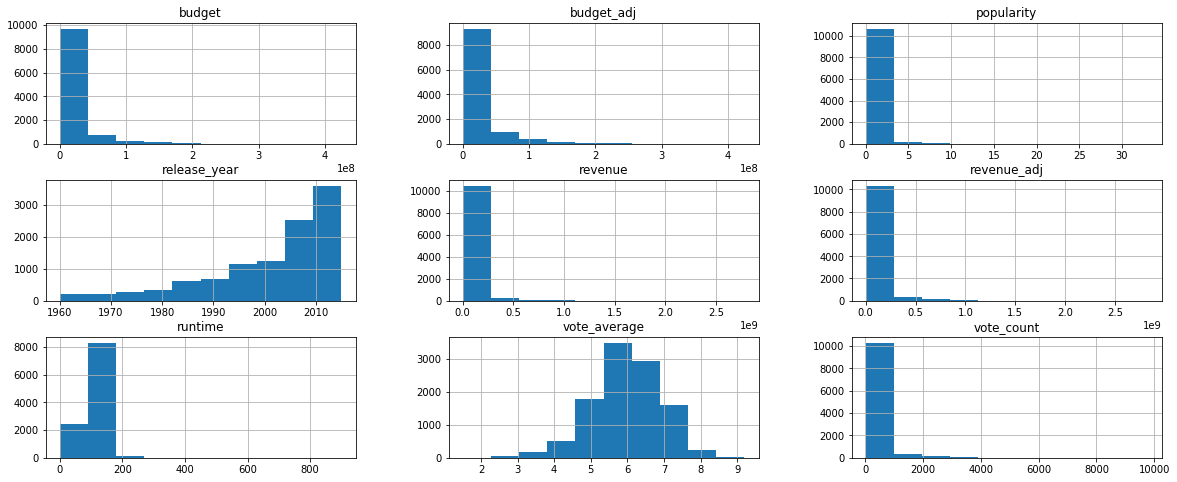

In [10]:
df.hist(figsize = (20, 8));

In [11]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [12]:
df['release_date'][0].month

6

In [13]:
df['release_month'] = df['release_date'].apply(lambda x : x.month)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
overview          10861 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null datetime64[ns]
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
release_month     10865 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(6), object(5)
memory usage: 1.7+ MB


In [15]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07,6.827612
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08,3.441764
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,1.000000
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,4.000000
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,7.000000
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07,10.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,12.000000


####  Now the data numerical columns is all filled with value, but I notice something usual for these numerical data. 

* runtime for the movie minimum is 0. 
* budge and budge_adj minimum is 0.
* revenue and revenue_adj minimum is 0.

These values surely does not make sense in the future analysis, they may due to some errors when recording the data into csv format.


### Data Cleaning 

In [16]:
df['genres'].head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

In [17]:
df['cast'].head()

0    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1    Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2    Shailene Woodley|Theo James|Kate Winslet|Ansel...
3    Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4    Vin Diesel|Paul Walker|Jason Statham|Michelle ...
Name: cast, dtype: object

In [18]:
df['director'].head()

0     Colin Trevorrow
1       George Miller
2    Robert Schwentke
3         J.J. Abrams
4           James Wan
Name: director, dtype: object

"genre", "cast", will have several values which are seperated by '|', split cast, director, genre, into a several columns in the datasets   

In [19]:
casts = df['cast'].str.split('|', expand = True).rename(columns = lambda x: f"cast_{x+1}")
directors = df['director'].str.split('|', expand = True).rename(columns = lambda x: f"director_{x+1}")
genres = df['genres'].str.split('|', expand = True).rename(columns = lambda x: f"genre_{x+1}")

df = pd.concat([df, casts, directors, genres], axis = 1)
df.drop(['cast', 'director', 'genres'], axis = 1, inplace = True)
df.head()

,popularity,budget,revenue,original_title,overview,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,cast_1,cast_2,cast_3,cast_4,cast_5,director_1,director_2,director_3,director_4,director_5,director_6,director_7,director_8,director_9,director_10,director_11,director_12,director_13,director_14,director_15,director_16,director_17,director_18,director_19,director_20,director_21,director_22,director_23,director_24,director_25,director_26,director_27,director_28,director_29,director_30,director_31,director_32,director_33,director_34,director_35,director_36,genre_1,genre_2,genre_3,genre_4,genre_5
0,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Colin Trevorrow,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Action,Adventure,Science Fiction,Thriller,None
1,28.419936,150000000,378436354,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,George Miller,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Action,Adventure,Science Fiction,Thriller,None
2,13.112507,110000000,295238201,Insurgent,Beatrice Prior must confront her inner demons ...,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Robert Schwentke,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Adventure,Science Fiction,Thriller,None,None
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,J.J. Abrams,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Action,Adventure,Science Fiction,Fantasy,None
4,9.335014,190000000,1506249360,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,James Wan,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Action,Crime,Thriller,None,None


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 59 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
overview          10861 non-null object
runtime           10865 non-null int64
release_date      10865 non-null datetime64[ns]
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
release_month     10865 non-null int64
cast_1            10789 non-null object
cast_2            10645 non-null object
cast_3            10555 non-null object
cast_4            10446 non-null object
cast_5            10133 non-null object
director_1        10821 non-null object
director_2        754 non-null object
director_3        114 non-null object
director_4        42 non-null object
director_5  

As we can see many director columns is empty, which we can drop more columns after 'director_5'  

In [21]:
columns = ['director_'+ str(i) for i in range(7, 37)]
df.drop(columns, axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 29 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
overview          10861 non-null object
runtime           10865 non-null int64
release_date      10865 non-null datetime64[ns]
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
release_month     10865 non-null int64
cast_1            10789 non-null object
cast_2            10645 non-null object
cast_3            10555 non-null object
cast_4            10446 non-null object
cast_5            10133 non-null object
director_1        10821 non-null object
director_2        754 non-null object
director_3        114 non-null object
director_4        42 non-null object
director_5  

In [22]:
df.head()

,popularity,budget,revenue,original_title,overview,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,cast_1,cast_2,cast_3,cast_4,cast_5,director_1,director_2,director_3,director_4,director_5,director_6,genre_1,genre_2,genre_3,genre_4,genre_5
0,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Colin Trevorrow,None,None,None,None,None,Action,Adventure,Science Fiction,Thriller,None
1,28.419936,150000000,378436354,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,George Miller,None,None,None,None,None,Action,Adventure,Science Fiction,Thriller,None
2,13.112507,110000000,295238201,Insurgent,Beatrice Prior must confront her inner demons ...,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Robert Schwentke,None,None,None,None,None,Adventure,Science Fiction,Thriller,None,None
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,J.J. Abrams,None,None,None,None,None,Action,Adventure,Science Fiction,Fantasy,None
4,9.335014,190000000,1506249360,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,James Wan,None,None,None,None,None,Action,Crime,Thriller,None,None


In [23]:
df.shape

(10865, 29)

I will not directly delete the movies here where runtime is 0, budget_adj, revenue_adj is 0, since in answering the first question, we need all the movies. But I will create a new dataframe to answer the second question, where discuss the high revenue movies.   

In [24]:
rdf = df[df['revenue_adj']!=0].copy()
rdf.shape

(4849, 29)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which genres are most popular from year to year? 

For this question, I use the dataframe where expanded the genre columns for several genres. Because each movie can have several genres, therefore each year, I would count which genre dictionary, where the key in genre, value is the number of times a genre appears in a movie. In here, I choose top 3 genres per year.

In [25]:
all_genres = []
for i in range(1, 6):
    all_genres.extend(set(df['genre_'+str(i)].values))
all_genres = set(all_genres)
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 None,
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 nan}

In [26]:
data = []
for i in sorted(df.release_year.unique()):
    genres = []
    ## this is a nested list of movie genre
    year_genre = df.loc[df['release_year'] == i, 'genre_1':'genre_5'].values
    ## flatten the nested list of genre, creat a counter which record which genre appears how many times. 
    counts = Counter([i for sub in year_genre for i in sub])
    ## delete None key
    del counts[None]
    # get me most top 3 movie genre 
#     print(i, [val[0] for val in counts.most_common(3)]) 
    top3 = [val[0] for val in counts.most_common(3)]
    row = {'year':i,
          'top1_genre':top3[0],
          'top2_genre':top3[1],
          'top3_genre':top3[2],
          }
    data.append(row)
    
movie_year_genre = pd.DataFrame(data ,columns = ['year', 'top1_genre', 'top2_genre', 'top3_genre'])
movie_year_genre

,year,top1_genre,top2_genre,top3_genre
0,1960,Drama,Action,Comedy
1,1961,Drama,Comedy,Romance
2,1962,Drama,Action,Adventure
3,1963,Comedy,Drama,Thriller
4,1964,Drama,Comedy,Crime
5,1965,Drama,Thriller,Action
6,1966,Comedy,Drama,Action
7,1967,Comedy,Drama,Romance
8,1968,Drama,Comedy,Action
9,1969,Drama,Comedy,Action


As we can see in here, Drama is consistently the most popular genre, only  comedy appears in some years, but recent years, Drama is the most popular one. Second popular movie genre is comedy. For 3rd popular movie genre is Thriller/Action. 

I also group the genre by year, and count how many times a genre appears in most popular, second popular and third popular genres. As we can clearly see below, which movie is more popular.

In [27]:
gp_top1 = movie_year_genre[['year', 'top1_genre']].groupby('top1_genre').count()
gp_top2 = movie_year_genre[['year', 'top2_genre']].groupby('top2_genre').count()
gp_top3 = movie_year_genre[['year', 'top3_genre']].groupby('top3_genre').count()
gp_genre = pd.concat([gp_top1, gp_top2, gp_top3], axis = 1, sort=False)

gp_genre.fillna(0, inplace = True)
gp_genre = gp_genre.astype(int)
gp_genre.reset_index(inplace = True)
gp_genre.columns = ['genre', 'top1', 'top2', 'top3']
gp_genre

,genre,top1,top2,top3
0,Comedy,10,32,4
1,Drama,46,10,0
2,Action,0,3,16
3,Adventure,0,1,2
4,Crime,0,1,2
5,Thriller,0,9,25
6,Horror,0,0,5
7,Romance,0,0,2


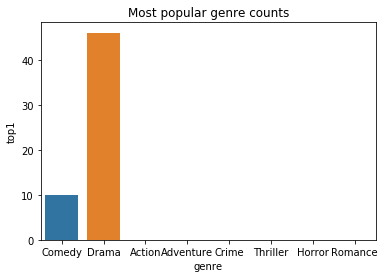

In [28]:
## most popular movie genre counts
sns.barplot( x="genre", y="top1", data=gp_genre).set_title("Most popular genre counts");

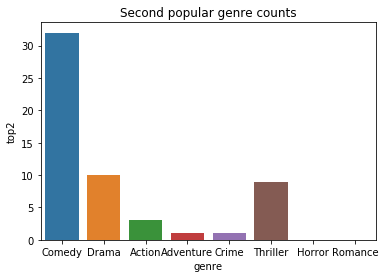

In [29]:
## Second popular movie genre counts
sns.barplot( x="genre", y="top2", data=gp_genre).set_title("Second popular genre counts");

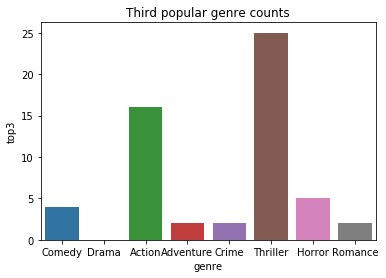

In [30]:
## third popular movie genre counts
sns.barplot( x="genre", y="top3", data=gp_genre).set_title("Third popular genre counts");

### Research Question 2:  What types of features are highly correlated with movies's adjusted revenue?

In this question, if I will make a regression model to predict a movie's revenue_adj, what features I will choose. First, will focus on the data where revenue_adj is not 0, rdf is the dataframe that I will use, which has already been cleaned and remove the revune_adj=0.   

In [31]:
# check that most features I need are not null
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 29 columns):
popularity        4849 non-null float64
budget            4849 non-null int64
revenue           4849 non-null int64
original_title    4849 non-null object
overview          4849 non-null object
runtime           4849 non-null int64
release_date      4849 non-null datetime64[ns]
vote_count        4849 non-null int64
vote_average      4849 non-null float64
release_year      4849 non-null int64
budget_adj        4849 non-null float64
revenue_adj       4849 non-null float64
release_month     4849 non-null int64
cast_1            4844 non-null object
cast_2            4833 non-null object
cast_3            4830 non-null object
cast_4            4815 non-null object
cast_5            4766 non-null object
director_1        4848 non-null object
director_2        293 non-null object
director_3        47 non-null object
director_4        18 non-null object
director_5        12 non-null obj

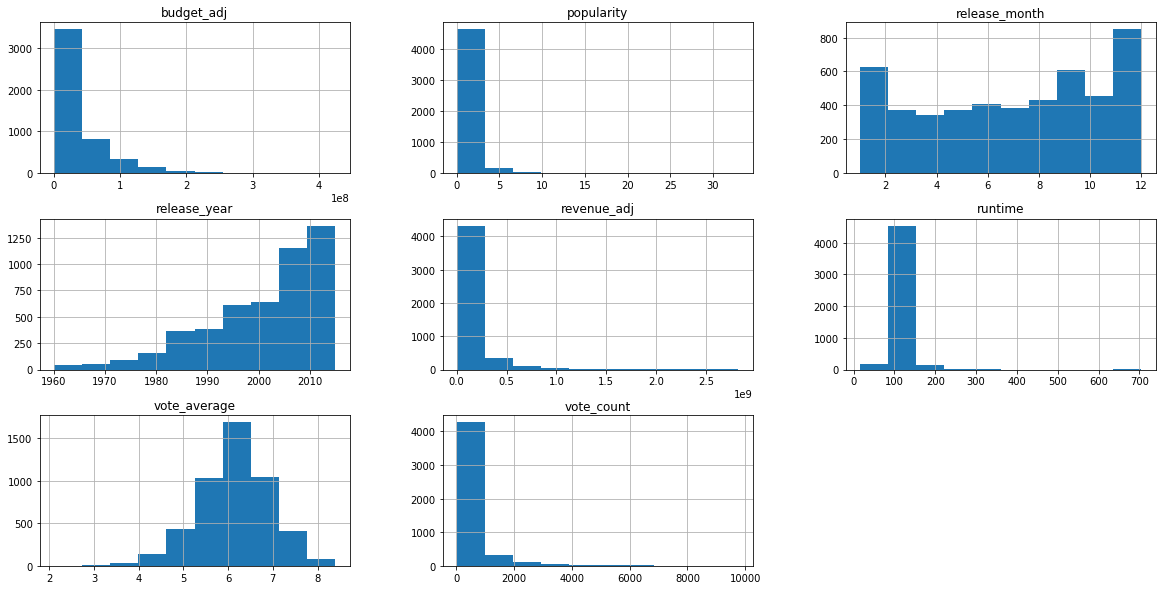

In [32]:
# histogram of numerical features in reduced datasets, after removing movies with adjusted revenue is 0
rdf[['popularity', 'runtime', 'vote_count', 'vote_average', 
     'release_year', 'budget_adj', 'revenue_adj', 'release_month']].hist(figsize=(20, 10));

In [33]:
rdf[['popularity', 'runtime', 'vote_count', 'vote_average', 
     'release_year', 'budget_adj', 'revenue_adj', 'release_month']].describe()
# we can see that this dataframe has no min value close to 0, as compared to original database. 

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4.849000e+03,4.849000e+03,4849.000000
mean,1.045202,107.968035,436.283151,6.149000,2000.919777,3.516208e+07,1.151009e+08,6.958548
std,1.356752,21.113779,806.485754,0.798707,11.569650,4.376117e+07,1.988557e+08,3.361555
min,0.001117,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00,1.000000
25%,0.387740,95.000000,46.000000,5.600000,1994.000000,2.329409e+06,1.046585e+07,4.000000
50%,0.680581,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.395666e+07,7.000000
75%,1.210502,117.000000,435.000000,6.700000,2010.000000,4.973516e+07,1.316482e+08,10.000000
max,32.985763,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,12.000000


In [34]:
## show the correlation between revenue_adj and other numerical features.
rdf[['popularity', 'runtime', 'vote_count', 'vote_average', 
     'release_year', 'budget_adj', 'revenue_adj', 'release_month']].corr()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
popularity,1.000000,0.201212,0.788293,0.288988,0.170276,0.440049,0.561746,0.037322
runtime,0.201212,1.000000,0.252323,0.308064,-0.099446,0.304123,0.263914,0.160336
vote_count,0.788293,0.252323,1.000000,0.351291,0.196837,0.533281,0.666495,0.022202
vote_average,0.288988,0.308064,0.351291,1.000000,-0.094828,0.049090,0.242319,0.112508
release_year,0.170276,-0.099446,0.196837,-0.094828,1.000000,0.083306,-0.099447,-0.061820
budget_adj,0.440049,0.304123,0.533281,0.049090,0.083306,1.000000,0.593280,0.067105
revenue_adj,0.561746,0.263914,0.666495,0.242319,-0.099447,0.593280,1.000000,0.061975
release_month,0.037322,0.160336,0.022202,0.112508,-0.061820,0.067105,0.061975,1.000000


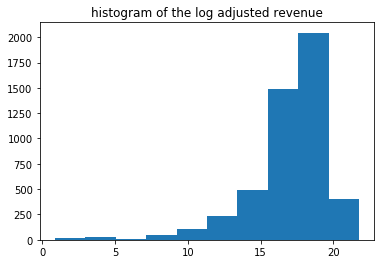

In [35]:
plt.title('histogram of the log adjusted revenue')
plt.hist(np.log(rdf['revenue_adj'])); # This log revenue_adj is better distributed than raw revenue_adj

As we can see before, since revenue_adj is not distributed normaly, we can apply the log function to it. Then we can see following vote_average has some trend related to log_adjusted_revenue.

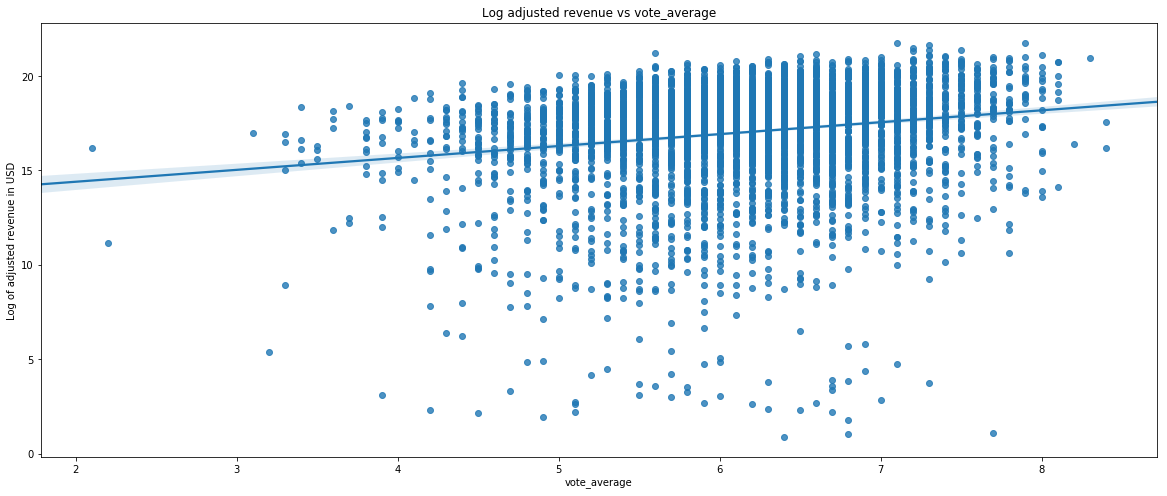

In [36]:
plt.figure(figsize=(20, 8))
ax = sns.regplot(x=rdf['vote_average'], y=np.log(rdf["revenue_adj"]), data=df)
ax.set(xlabel='vote_average', ylabel='Log of adjusted revenue in USD', 
       title = 'Log adjusted revenue vs vote_average');

In [37]:
def explore_pearsonr(rdf, col1, col2):
    pearson_coef, p_value = stats.pearsonr(rdf[col1].values, np.log(rdf[col2]).values)
    print('The pearson correlation between {:15s} and {:10s} is {:6.3f}'.format(col1, col2, pearson_coef))

In [38]:
for col in ['vote_count', 'vote_average', 'popularity', 'runtime', 'budget_adj', 'release_year', 'release_month']:
    explore_pearsonr(rdf, col, 'revenue_adj')

The pearson correlation between vote_count      and revenue_adj is  0.384
The pearson correlation between vote_average    and revenue_adj is  0.187
The pearson correlation between popularity      and revenue_adj is  0.350
The pearson correlation between runtime         and revenue_adj is  0.237
The pearson correlation between budget_adj      and revenue_adj is  0.485
The pearson correlation between release_year    and revenue_adj is -0.203
The pearson correlation between release_month   and revenue_adj is  0.077


As we can see from above discussion, 'vote_count', 'vote_average', 'popularity', 'runtime', 'budge_adj', 'relase_year' are all highly correlated to the movie's final revenue_adj. The only different is about release_year, which is negative correlation, which means if a movie is release earlier it will have higher revenue_adj. We could build a regression model to predict a movie's log_revenue_adj with above mentioned parameters. But I will not do it here, since it is a data scientist work. 

<a id='conclusions'></a>
## Conclusions

*  For the most popular movie genres from year to year, it looks like drama is the most popular movie. Ocassionally comedy will be popular for sometime. Second popular movie genre is comedy, then drama and thriller comes after. Third popular movie genre is thriller with action movies come after. 

* * The limitation of above analysis is that for older movies, there are only few of them existed in the datasets. Therefore the analysis may be bias at find out most popular movie for old yers. 

*  For the features that are highly correlated to revenue_adj, I will choose  'vote_count', 'vote_average', 'popularity', 'runtime', 'budget_adj', these features have higher positive correlated with the metric of revenue_adj. While for 'release_year' which is negative correlated with the metric of revenue_adj, means older movies in this datasets have higher revenue_adj. 

* * The limitation with above analysis is that even though above features are highly correlated to revenue_adj, some of the features are actually correlated, thus add the collinearity between features and model complexity when building regression model. 



In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0